In [1]:
# 라이브러리 로딩
import pandas as pd
import numpy as np
import keras

np.random.seed(2)

In [2]:
#데이터 로딩
data = pd.read_csv('C:/Users/s/Desktop/udemy/ML/6. credit card fraud detection/P39-Credit-Card-Fraud/Dataset/creditcard.csv')

## Data Exploration

In [3]:
# DATA 확인
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## pre-processing

In [4]:
# amount feature (-1,1) 정규화
from sklearn.preprocessing import StandardScaler
data['normalizedamount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(columns = 'Amount', axis=1)

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedamount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [6]:
# time feature 삭제
data = data.drop(['Time'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedamount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [7]:
# 독립, 반응 변수 분리
X = data.iloc[:, data.columns !='Class']
y = data.iloc[:, data.columns == 'Class']

In [8]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedamount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [9]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


# train, test split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [11]:
X_train.shape

(199364, 29)

In [12]:
X_test.shape

(85443, 29)

In [13]:
# numpy array로 변환 -> 나중에 필요
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep neural network

In [14]:
from keras.models import Sequential #순차모델
from keras.layers import Dense
from keras.layers import Dropout

In [15]:
# 우리의 모델은 sequential 모델이므로 한 레이가 다른 레이어에 이어서 오게 됌, 그리고 레이어의 스택을 정의.
# Dense 사이 Dropout 레이어 넣어 과적합 방지
# 필요하다 생각하는 만큼 넣은 후 나중 결과를 보고 다시 모델을 측정 할 것.
model = Sequential([
    Dense(units = 16, input_dim = 29, activation = 'relu'),   # deep 신경망에 첫 레이어에 예상되는 레이어의 수 입력(input_dim)은 데이터 세트의 열 숫자
    Dense(units = 24,activation = 'relu'),                             # 노드(unit)를 필요하다고 판단한 레이어에 노드 추가 16에서 24로 늘리겠다.
    Dropout(0.5),                            # 각 노드를 제외할 확률을 0.5
    Dense(20,activation = 'relu'),
    Dense(24,activation = 'relu'),
    Dense(1,activation = 'sigmoid'),        #시그모이드 activation을 사용(이진 분류니까)할 마지막 빼고 relu 활성화 함수 넣어주기 
])                                          # 마지막 레이어는 단일 출력 노드를 넣음. 거래가 부정거래인지 아닌지 나타내는 확률(sigmoid)

In [16]:
# model summary 확인
# 신경망에 학습시킬 파라미터가 약 2000개나 있음.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-trainabl

## Training

In [17]:
# 얼마나 틀리는지(loss)를 알게 하는 함수가 loss function=손실함수
# 옵티마이저 (Optimizer)는 손실 함수을 통해 얻은 손실값으로부터 모델을 업데이트하는 방식을 의미
# loss function의 최소값을 찾는 것을 학습의 목표로 한다.
# 여기서 최소값을 찾아가는 것을 최적화=Optimization 
model.compile(optimizer ='adam', loss ='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
13291/13291 [==============================] - 11s 777us/step - loss: 0.0090 - accuracy: 0.9988
Epoch 2/5
13291/13291 [==============================] - 10s 771us/step - loss: 0.0041 - accuracy: 0.9994
Epoch 3/5
13291/13291 [==============================] - 10s 762us/step - loss: 0.0036 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 11s 795us/step - loss: 0.0034 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 10s 771us/step - loss: 0.0034 - accuracy: 0.9994


In [18]:
score = model.evaluate(X_test, y_test)

2671/2671 [==============================] - 2s 538us/step - loss: 0.0044 - accuracy: 0.9994


In [19]:
print(score)

[0.004360884893685579, 0.9993796944618225]


## Confusion matrix

In [20]:
# scikit learn 웹페이지의 plot_confusion_matrix 코드사용할게용.
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [21]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

In [22]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())

Confusion matrix, without normalization
[[85272    24]
 [   29   118]]


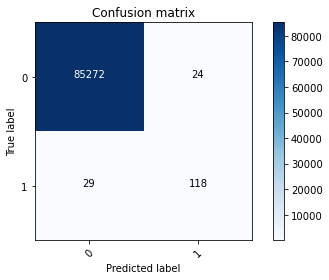

In [23]:
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

Confusion matrix, without normalization
[[284239     76]
 [    92    400]]


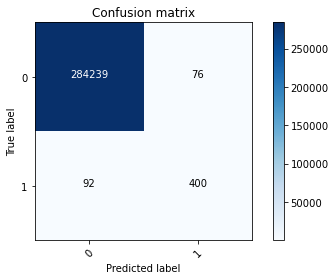

In [24]:
# 전체 데이터 셋으로 확인해보자
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
random_forest = RandomForestClassifier(n_estimators=100)

In [27]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [28]:
random_forest.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [29]:
y_pred = random_forest.predict(X_test)

In [30]:
random_forest.score(X_test, y_test)

0.9995435553526912

In [31]:
cnf_matrix = confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization
[[85290     6]
 [   33   114]]


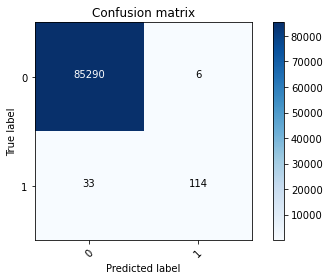

In [32]:
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [33]:
# 전체 데이터 세트
y_pred = random_forest.predict(X)

C:\Users\s\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [34]:
cnf_matrix = confusion_matrix(y, y_pred.round())

Confusion matrix, without normalization
[[284309      6]
 [    34    458]]


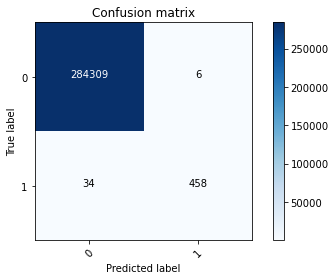

In [35]:
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

## Decision Trees

In [36]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [37]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
y_pred = decision_tree.predict(X_test)

In [39]:
decision_tree.score(X_test, y_test)

0.9992392589211521

In [40]:
y_pred = decision_tree.predict(X)

C:\Users\s\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [41]:
y_expected = pd.DataFrame(y)

Confusion matrix, without normalization
[[284286     29]
 [    36    456]]


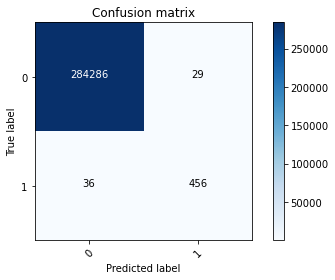

In [42]:
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

## Sampling
불균형한 데이터 셋이므로 샘플링 기술을 적용해야 합니다.

In [43]:
## Undersampling
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
number_records_fraud

492

In [44]:
normal_indices =data[data.Class == 0].index

In [45]:
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
len(random_normal_indices)

492

In [46]:
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
len(under_sample_indices)

984

In [47]:
# 데이터에서 undersampling 된 것들만 가지고왔다.
under_sample_data = data.iloc[under_sample_indices, :]

In [48]:
# undersample 데이터 나누기
X_undersample = under_sample_data.iloc[:, under_sample_data.columns !='Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns =='Class']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.3)

In [50]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [51]:
# 위에서 사용한 deep learning model 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-trainabl

In [52]:
# 위 학습코드 그대로 진행해 보겠습니다.

# 얼마나 틀리는지(loss)를 알게 하는 함수가 loss function=손실함수
# 옵티마이저 (Optimizer)는 손실 함수을 통해 얻은 손실값으로부터 모델을 업데이트하는 방식을 의미
# loss function의 최소값을 찾는 것을 학습의 목표로 한다.
# 여기서 최소값을 찾아가는 것을 최적화=Optimization 
model.compile(optimizer ='adam', loss ='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
46/46 [==============================] - 0s 1ms/step - loss: 0.5679 - accuracy: 0.9099
Epoch 2/5
46/46 [==============================] - 0s 1ms/step - loss: 0.2730 - accuracy: 0.9128
Epoch 3/5
46/46 [==============================] - 0s 828us/step - loss: 0.2149 - accuracy: 0.9142
Epoch 4/5
46/46 [==============================] - 0s 851us/step - loss: 0.1944 - accuracy: 0.9360
Epoch 5/5
46/46 [==============================] - 0s 827us/step - loss: 0.1749 - accuracy: 0.9448


Confusion matrix, without normalization
[[145   1]
 [ 18 132]]


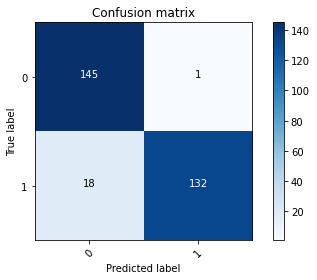

In [53]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

## Smote ( oversampling )

In [54]:
!pip install imbalanced-learn

In [55]:
from imblearn.over_sampling import SMOTE

In [63]:
# smote를 이용해서 변수를 찾아봅시다.
X_resample, y_resample = SMOTE().fit_resample(X,y.values.ravel())

In [64]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.3)

In [66]:
## deep learning 모델 학습위해
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [67]:
# 위 학습코드 그대로 진행해 보겠습니다.

# 얼마나 틀리는지(loss)를 알게 하는 함수가 loss function=손실함수
# 옵티마이저 (Optimizer)는 손실 함수을 통해 얻은 손실값으로부터 모델을 업데이트하는 방식을 의미
# loss function의 최소값을 찾는 것을 학습의 목표로 한다.
# 여기서 최소값을 찾아가는 것을 최적화=Optimization 
model.compile(optimizer ='adam', loss ='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
26537/26537 [==============================] - 21s 771us/step - loss: 0.0298 - accuracy: 0.9893
Epoch 2/5
26537/26537 [==============================] - 20s 767us/step - loss: 0.0146 - accuracy: 0.9959
Epoch 3/5
26537/26537 [==============================] - 20s 759us/step - loss: 0.0117 - accuracy: 0.9968
Epoch 4/5
26537/26537 [==============================] - 20s 761us/step - loss: 0.0104 - accuracy: 0.9973
Epoch 5/5
26537/26537 [==============================] - 21s 775us/step - loss: 0.0093 - accuracy: 0.9977


Confusion matrix, without normalization
[[85017   236]
 [  165 85171]]


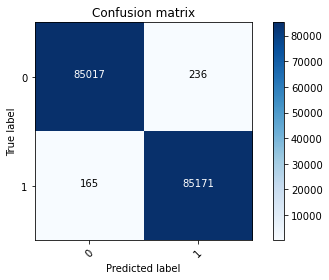

In [68]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()